In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("movies_processing.csv")

# df = df[['Plot_clean', 'Genre_list']].dropna()


In [3]:
import re

def clean_genre_list(genres):
    clean_genres = []
    for g in genres.split(','):
        g = g.lower()
        g = re.sub(r"[\[\]'\"()]", "", g)  # bỏ ký tự rác
        g = g.replace("movies", "")
        g = g.replace("movie", "")
        g = g.strip().title()
        if g:
            clean_genres.append(g)
    return list(set(clean_genres))  # bỏ trùng


In [4]:
df['Genre_clean'] = df['Genre_list'].apply(clean_genre_list)


In [5]:
from collections import Counter

all_genres = [g for genres in df['Genre_clean'] for g in genres]
genre_count = Counter(all_genres)

valid_genres = {g for g, c in genre_count.items() if c >= 20}

df['Genre_clean'] = df['Genre_clean'].apply(
    lambda genres: [g for g in genres if g in valid_genres]
)

df = df[df['Genre_clean'].map(len) > 0]


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Genre_clean'])


In [7]:
print(len(mlb.classes_))
print(mlb.classes_)


10
['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Horror'
 'Romance' 'Short' 'Thriller']


In [8]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X = tfidf.fit_transform(df['Plot_clean'])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
logreg_model = OneVsRestClassifier(
    LogisticRegression(max_iter=300)
)

logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(
    y_test,
    y_pred_logreg,
    target_names=mlb.classes_
))


=== Logistic Regression ===
              precision    recall  f1-score   support

      Action       0.83      0.07      0.13       219
   Adventure       0.00      0.00      0.00       111
   Animation       0.83      0.04      0.08       117
      Comedy       0.65      0.20      0.31       435
       Crime       0.75      0.04      0.08       140
 Documentary       0.90      0.61      0.73       417
      Horror       0.86      0.12      0.22       145
     Romance       0.68      0.09      0.16       161
       Short       0.67      0.02      0.05       161
    Thriller       0.40      0.01      0.02       165

   micro avg       0.81      0.20      0.32      2071
   macro avg       0.66      0.12      0.18      2071
weighted avg       0.70      0.20      0.27      2071
 samples avg       0.27      0.24      0.25      2071



e:\IT\Projects\Python\data-mining\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [11]:
svm_model = OneVsRestClassifier(
    LinearSVC()
)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("=== Linear SVM ===")
print(classification_report(
    y_test,
    y_pred_svm,
    target_names=mlb.classes_
))


=== Linear SVM ===
              precision    recall  f1-score   support

      Action       0.56      0.32      0.41       219
   Adventure       0.46      0.20      0.28       111
   Animation       0.65      0.19      0.29       117
      Comedy       0.53      0.42      0.47       435
       Crime       0.59      0.23      0.33       140
 Documentary       0.81      0.74      0.77       417
      Horror       0.69      0.39      0.50       145
     Romance       0.61      0.30      0.40       161
       Short       0.33      0.11      0.17       161
    Thriller       0.32      0.13      0.19       165

   micro avg       0.62      0.38      0.47      2071
   macro avg       0.56      0.30      0.38      2071
weighted avg       0.58      0.38      0.44      2071
 samples avg       0.45      0.42      0.42      2071



e:\IT\Projects\Python\data-mining\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [12]:
nb_model = OneVsRestClassifier(
    MultinomialNB()
)

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("=== Multinomial Naive Bayes ===")
print(classification_report(
    y_test,
    y_pred_nb,
    target_names=mlb.classes_
))


=== Multinomial Naive Bayes ===

e:\IT\Projects\Python\data-mining\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



              precision    recall  f1-score   support

      Action       0.87      0.06      0.11       219
   Adventure       1.00      0.03      0.05       111
   Animation       1.00      0.03      0.05       117
      Comedy       0.73      0.13      0.22       435
       Crime       1.00      0.01      0.03       140
 Documentary       0.88      0.62      0.73       417
      Horror       1.00      0.02      0.04       145
     Romance       0.33      0.01      0.01       161
       Short       0.00      0.00      0.00       161
    Thriller       0.00      0.00      0.00       165

   micro avg       0.85      0.17      0.28      2071
   macro avg       0.68      0.09      0.12      2071
weighted avg       0.70      0.17      0.22      2071
 samples avg       0.23      0.21      0.21      2071



e:\IT\Projects\Python\data-mining\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [13]:
from sklearn.metrics import f1_score

models_results = {}

models_results['Logistic Regression'] = {
    'micro': f1_score(y_test, y_pred_logreg, average='micro'),
    'macro': f1_score(y_test, y_pred_logreg, average='macro'),
    'weighted': f1_score(y_test, y_pred_logreg, average='weighted')
}

models_results['Linear SVM'] = {
    'micro': f1_score(y_test, y_pred_svm, average='micro'),
    'macro': f1_score(y_test, y_pred_svm, average='macro'),
    'weighted': f1_score(y_test, y_pred_svm, average='weighted')
}

models_results['Naive Bayes'] = {
    'micro': f1_score(y_test, y_pred_nb, average='micro'),
    'macro': f1_score(y_test, y_pred_nb, average='macro'),
    'weighted': f1_score(y_test, y_pred_nb, average='weighted')
}

f1_df = pd.DataFrame(models_results).T
f1_df


,micro,macro,weighted
Logistic Regression,0.316770,0.177959,0.268751
Linear SVM,0.467805,0.380163,0.444746
Naive Bayes,0.276699,0.124823,0.217024


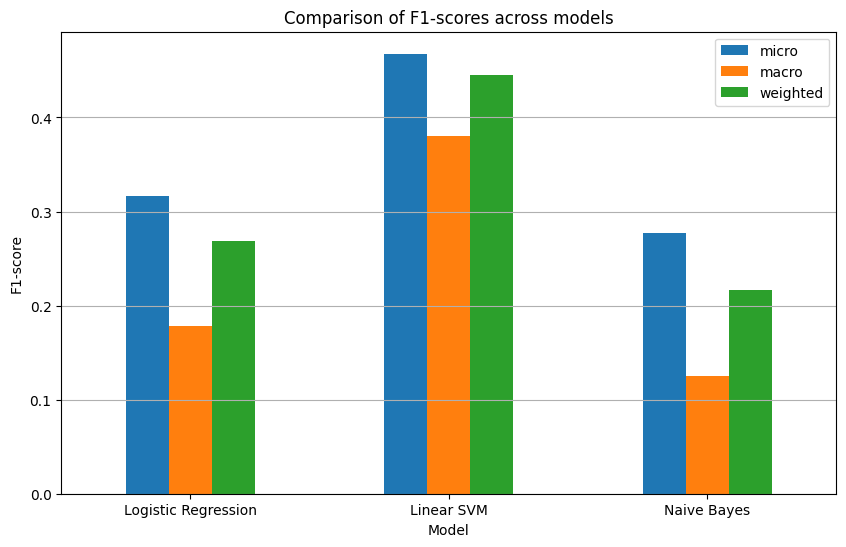

In [14]:
import matplotlib.pyplot as plt

f1_df.plot(kind='bar', figsize=(10,6))
plt.title("Comparison of F1-scores across models")
plt.ylabel("F1-score")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [15]:
from sklearn.metrics import classification_report

report = classification_report(
    y_test,
    y_pred_svm,
    target_names=mlb.classes_,
    output_dict=True
)

genre_df = pd.DataFrame(report).T
genre_df = genre_df.iloc[:-3]  # bỏ micro/macro avg

genre_df.sort_values(by='f1-score').head(10)


e:\IT\Projects\Python\data-mining\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,precision,recall,f1-score,support
Short,0.333333,0.111801,0.167442,161.0
Thriller,0.323529,0.133333,0.188841,165.0
Adventure,0.458333,0.198198,0.276730,111.0
Animation,0.647059,0.188034,0.291391,117.0
Crime,0.592593,0.228571,0.329897,140.0
Romance,0.607595,0.298137,0.400000,161.0
Action,0.563492,0.324201,0.411594,219.0
Comedy,0.529070,0.418391,0.467266,435.0
micro avg,0.615931,0.377113,0.467805,2071.0
Horror,0.691358,0.386207,0.495575,145.0


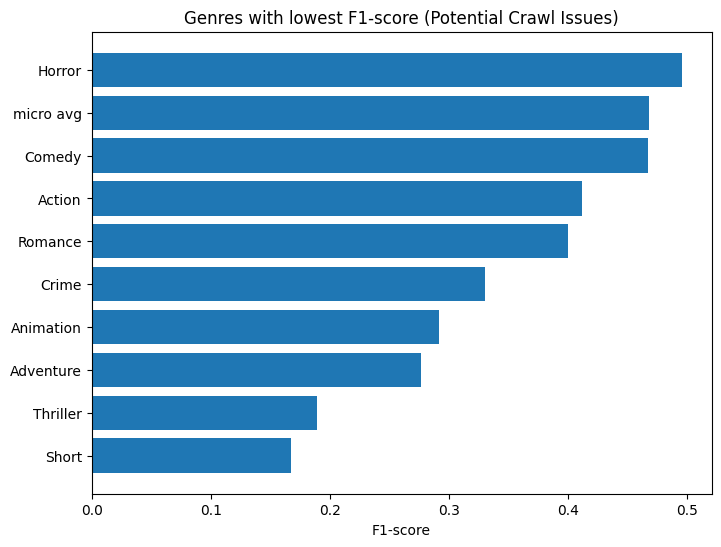

In [16]:
genre_df_sorted = genre_df.sort_values(by='f1-score')

plt.figure(figsize=(8,6))
plt.barh(
    genre_df_sorted.index[:10],
    genre_df_sorted['f1-score'][:10]
)
plt.title("Genres with lowest F1-score (Potential Crawl Issues)")
plt.xlabel("F1-score")
plt.show()


In [17]:
low_f1_genres = genre_df_sorted.index[:3].tolist()
low_f1_genres


['Short', 'Thriller', 'Adventure']